In [1]:
import requests
import geopandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
# df = geopandas.read_file(r'C:\Users\Radin\Desktop\ML-Basic\Project\First Project\Project1_Shadi\School_Districts_in_King_County___schdst_area.geojson')
df = geopandas.read_file('/home/rahmani/work/ali/ML/source/ml_basic_p1/Project1_Shadi/Project1_Shadi/School_Districts_in_King_County___schdst_area.geojson')


In [14]:
Seattle_geo = df.loc[df['NAME']== 'Seattle','geometry']
VASHON_geo = df.loc[df['NAME']== 'Vashon Island','geometry']
MERCER_ISLAND_geo = df.loc[df['NAME']== 'Mercer Island','geometry']
SHORELINE_geo = df.loc[df['NAME']== 'Shoreline','geometry']

In [18]:
df1 = geopandas.read_file(r'/home/rahmani/work/ali/ML/source/ml_basic_p1/Project1_Shadi/Project1_Shadi/Zipcodes_for_King_County_and_Surrounding_Area___zipcode_area/Zipcodes_for_King_County_and_Surrounding_Area___zipcode_area.shp')

In [19]:
df1_rev=df1.loc[df1.COUNTY=='033']

In [22]:
name_pop_zipcode_df = pd.read_csv('./Name_Pop_ZipCode.csv')
name_pop_zipcode_df['Population']=name_pop_zipcode_df.Population.replace(',', '')
name_pop_zipcode_df['Population'] = name_pop_zipcode_df['Population'].replace(r'\.0$', '', regex=True).astype('float64')
name_pop_zipcode_df['ZipCode'] = name_pop_zipcode_df['ZipCode'].astype(str).replace(r'\.0$', '', regex=True)

In [23]:
def find_name(x):
    find_name = name_pop_zipcode_df.loc[name_pop_zipcode_df['ZipCode'] == str(x), 'City Name'].values[0]
    return find_name

In [24]:
def find_pop(x):
    find_pop = name_pop_zipcode_df.loc[name_pop_zipcode_df['ZipCode'] == str(x), 'Population'].values[0]
    return find_pop

In [25]:
for code in name_pop_zipcode_df['ZipCode']:
    df1_rev.loc[df1_rev['ZIPCODE']== str(code), 'Name'] = find_name(code)
    df1_rev.loc[df1_rev['ZIPCODE']== str(code), 'Population'] = find_pop(code)

/home/rahmani/work/envs/ML/lib/python3.11/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/home/rahmani/work/envs/ML/lib/python3.11/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [26]:
df2=df1_rev.dropna()
df2.loc[df2['Name'].isnull()]
df2.loc[df1_rev['Name']=='SEATTLE', 'geometry']=Seattle_geo.values[0]
df2.loc[df1_rev['Name']=='VASHON ISLAND', 'geometry']=VASHON_geo.values[0]
df2.loc[df1_rev['Name']=='MERCER ISLAND', 'geometry']=MERCER_ISLAND_geo.values[0]
df2.loc[df1_rev['Name']=='SHORELINE', 'geometry']=SHORELINE_geo.values[0]

In [29]:
count_inspect_city_name = pd.read_csv(r'./count_inspect_city_name.csv')
count_inspect_city_name.drop('Unnamed: 0', axis=1,inplace = True)
count_inspect_city_name

,city,inspection_date,number_name
0,ALGONA,92,8
1,AUBURN,5154,313
2,BARING,4,1
3,BELLEVUE,9669,660
4,BELLINGHAM,1,1
5,BLACK DIAMOND,304,28
6,BOTHELL,1536,92
7,BURIEN,2630,182
8,CARNATION,505,28
9,CLYDE HILL,73,5


In [30]:
def find_num_inspection(x):
 find_inspection= np.array([0])
 find_inspection = count_inspect_city_name.loc[count_inspect_city_name['city'] == x, 'inspection_date']
 try:
      return find_inspection.values[0]
 except IndexError:
      print("Array is empty")

In [31]:
def find_num_name(x):
 find_name= np.array([0])
 find_name = count_inspect_city_name.loc[count_inspect_city_name['city'] == x, 'number_name']
 try:
      return find_name.values[0]
 except IndexError:
      print("Array is empty")

In [32]:
for name in df2['Name']:
    df2.loc[df2['Name']== str(name), 'num_inspection'] = find_num_inspection(name)
    df2.loc[df2['Name']== str(name), 'num_name'] = find_num_name(name)

/home/rahmani/work/envs/ML/lib/python3.11/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/home/rahmani/work/envs/ML/lib/python3.11/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [33]:
df2.head(5)

,OBJECTID,ZIP,ZIPCODE,COUNTY,ZIP_TYPE,Shape_Leng,Shape_Area,geometry,Name,Population,num_inspection,num_name
0,1,98031,98031,033,Standard,117508.232813,2.280129e+08,"POLYGON ((-122.21842 47.43750, -122.21935 47.4...",KENT,134835.0,8509.0,521.0
1,2,98032,98032,033,Standard,166737.665152,4.826754e+08,"MULTIPOLYGON (((-122.24187 47.44122, -122.2411...",KENT,134835.0,8509.0,521.0
2,3,98030,98030,033,Standard,94409.538568,2.000954e+08,"POLYGON ((-122.21006 47.38692, -122.21007 47.3...",KENT,134835.0,8509.0,521.0
3,4,98029,98029,033,Standard,111093.715481,2.774247e+08,"POLYGON ((-121.97642 47.58430, -121.97645 47.5...",ISSAQUAH,39505.0,3256.0,210.0
4,5,98028,98028,033,Standard,71488.230747,1.996531e+08,"POLYGON ((-122.22788 47.76909, -122.22790 47.7...",KENMORE,23502.0,971.0,51.0


<Axes: >

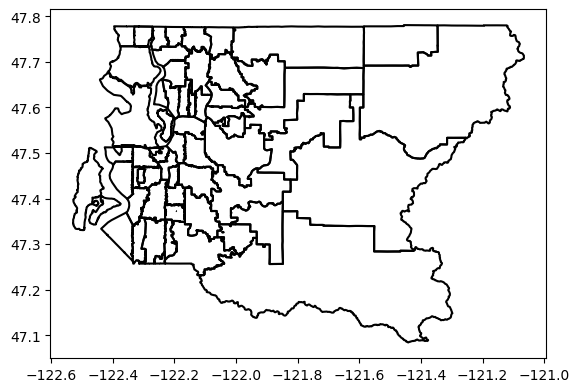

In [34]:
df2.boundary.plot(edgecolor='black')

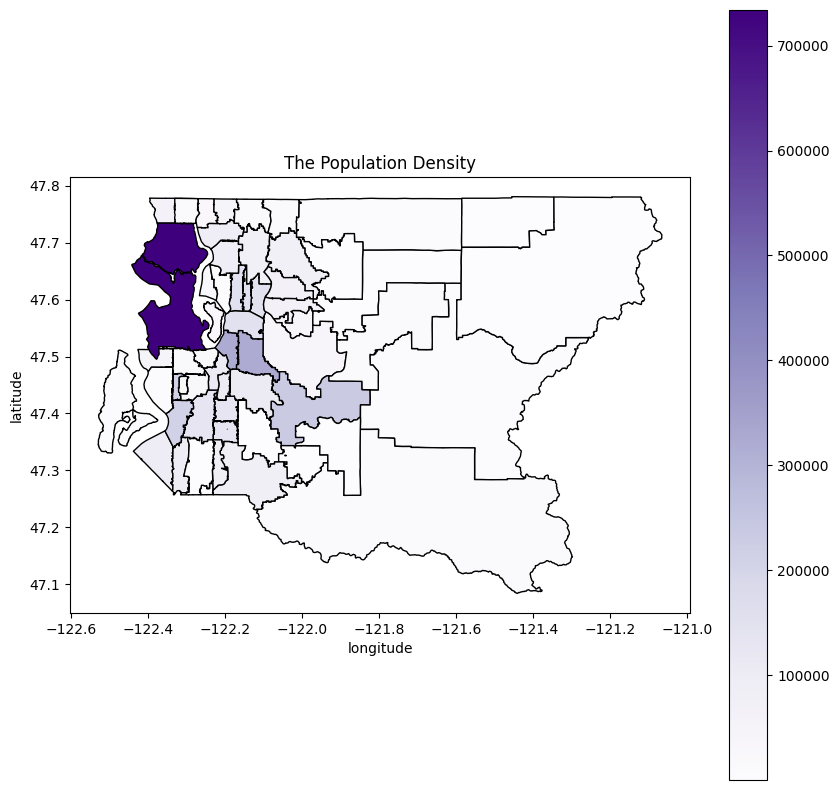

In [42]:
df2.plot(column='Population', cmap='Purples', figsize=(10,10), edgecolor='black',legend=True)
plt.title('The Population Density')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.savefig("The Population Density.png")

In [36]:
one_close_df = pd.read_csv('one_close.csv')
two_close_df = pd.read_csv('two_close.csv')
three_close_df = pd.read_csv('three_close.csv')
four_close_df = pd.read_csv('four_close.csv')

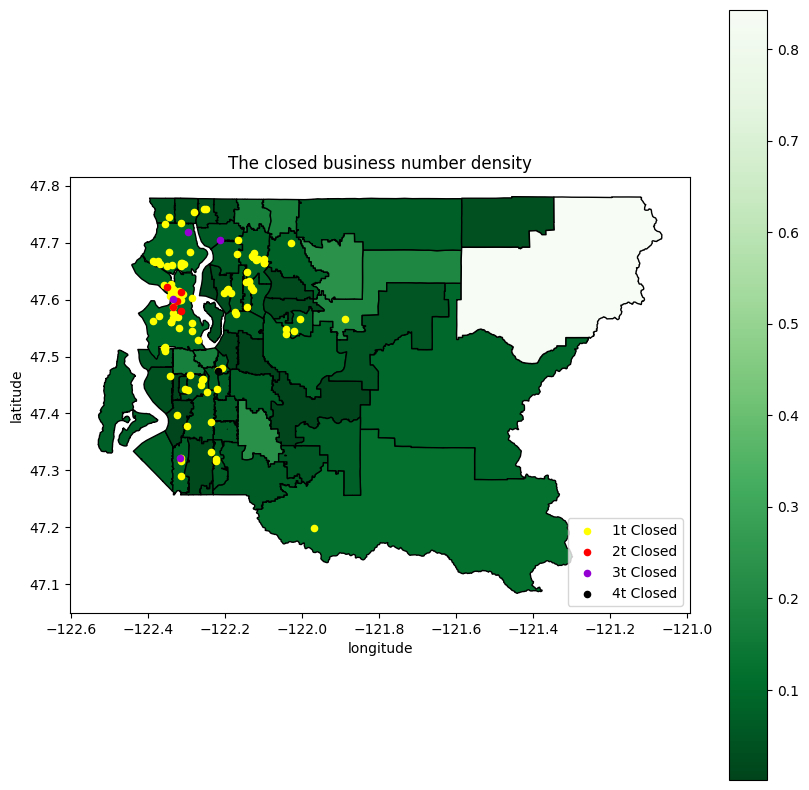

In [50]:
fig, ax = plt.subplots()
df2.plot(ax=ax, column=df2['num_inspection']/df2['Population'], cmap='Greens_r', figsize=(10,10), edgecolor='black',legend=True)

one_close_df.plot(ax=ax, kind='scatter', x='longitude', y='latitude', color='yellow', figsize=(10, 10))
two_close_df.plot(ax=ax, kind='scatter', x='longitude', y='latitude', color='red', figsize=(10, 10))
three_close_df.plot(ax=ax, kind='scatter', x='longitude', y='latitude', color='#9400D3', figsize=(10, 10))
four_close_df.plot(ax=ax, kind='scatter', x='longitude', y='latitude', color='black', figsize=(10, 10))
plt.title('The closed business number density')
plt.legend(["1t Closed", "2t Closed", "3t Closed", "4t Closed"], loc='lower right')
fig.savefig("The closed business number density.png")

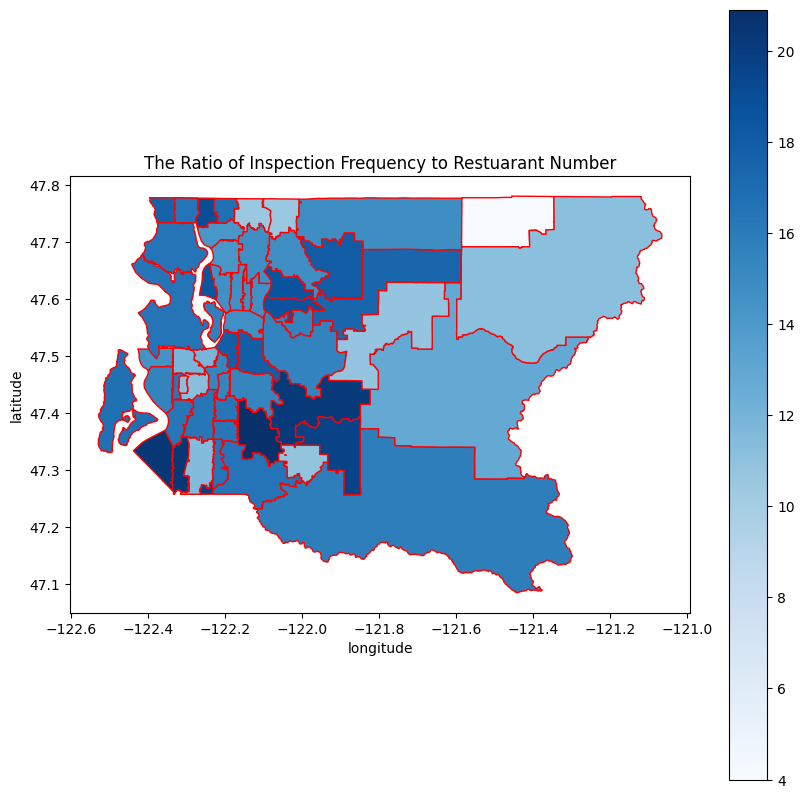

In [51]:
df2.plot(column=df2['num_inspection']/df2['num_name'], cmap='Blues', figsize=(10,10), edgecolor='red',legend=True)
plt.title('The Ratio of Inspection Frequency to Restuarant Number')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.savefig("The Ratio of Inspection Frequency to Restuarant Number.png")

In [41]:
df2


,OBJECTID,ZIP,ZIPCODE,COUNTY,ZIP_TYPE,Shape_Leng,Shape_Area,geometry,Name,Population,num_inspection,num_name
0,1,98031,98031,033,Standard,117508.232813,2.280129e+08,"POLYGON ((-122.21842 47.43750, -122.21935 47.4...",KENT,134835.0,8509.0,521.0
1,2,98032,98032,033,Standard,166737.665152,4.826754e+08,"MULTIPOLYGON (((-122.24187 47.44122, -122.2411...",KENT,134835.0,8509.0,521.0
2,3,98030,98030,033,Standard,94409.538568,2.000954e+08,"POLYGON ((-122.21006 47.38692, -122.21007 47.3...",KENT,134835.0,8509.0,521.0
3,4,98029,98029,033,Standard,111093.715481,2.774247e+08,"POLYGON ((-121.97642 47.58430, -121.97645 47.5...",ISSAQUAH,39505.0,3256.0,210.0
4,5,98028,98028,033,Standard,71488.230747,1.996531e+08,"POLYGON ((-122.22788 47.76909, -122.22790 47.7...",KENMORE,23502.0,971.0,51.0
5,6,98027,98027,033,Standard,253756.023752,1.661884e+09,"POLYGON ((-122.07917 47.57205, -122.07340 47.5...",ISSAQUAH,39505.0,3256.0,210.0
6,7,98038,98038,033,Standard,316441.960766,1.649847e+09,"POLYGON ((-122.03701 47.45985, -122.03703 47.4...",HOBART MAPLE VALLEY,234250.0,1758.0,87.0
7,8,98039,98039,033,Standard,61258.027277,1.551774e+08,"POLYGON ((-122.23273 47.63926, -122.23267 47.6...",MEDINA,25934.0,111.0,6.0
8,9,98040,98040,033,Standard,86242.186829,3.556309e+08,"POLYGON ((-122.24475 47.59601, -122.24478 47.5...",MERCER ISLAND,25442.0,927.0,59.0
9,10,98042,98042,033,Standard,207993.204555,7.624208e+08,"MULTIPOLYGON (((-122.15061 47.42511, -122.1506...",COVINGTON,5717.0,1318.0,63.0
